# CSC420 Assignment 3 Question 3

In [211]:
import matplotlib.pyplot as plt
import scipy
import cv2
import numpy as np
import math

Import images

(1200, 900)


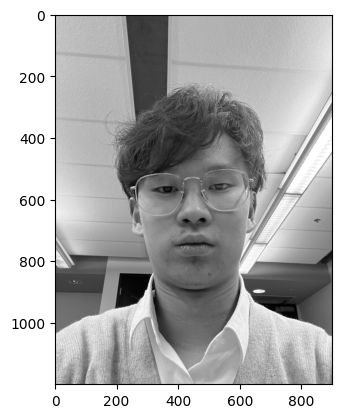

In [212]:
raw_image = cv2.imread('Q3_img.jpg', cv2.IMREAD_GRAYSCALE)
raw_image_colored = cv2.imread('Image.jpg')
corp_image = cv2.resize(raw_image, (900, 1200), interpolation = cv2.INTER_AREA)
shape = np.array(corp_image).shape
plt.imshow(corp_image, cmap='gray')
plt.imshow
print(corp_image.shape)

In [213]:
sobelx = np.array(cv2.Sobel(corp_image, cv2.CV_64F, 1, 0, ksize=3))
sobely = np.array(cv2.Sobel(corp_image, cv2.CV_64F, 0, 1, ksize=3))
gradient = np.array([sobelx, sobely])
gradient = gradient.transpose(1, 2, 0)
print(gradient.shape)

(1200, 900, 2)


In [214]:
def clip_and_count(gradient, threshold=50):
    flags = 0 * np.ones(shape=(gradient.shape[0], gradient.shape[1]), dtype=int)
    height = gradient.shape[0]
    width = gradient.shape[1]
    groups = []
    for h in range(height):
        for w in range(width):
            magnitude = np.linalg.norm(gradient[h][w])
            if magnitude >= threshold:
                ratio = np.divide(gradient[h][w][0], gradient[h][w][1],
                                  out=np.zeros_like(gradient[h][w][0]), where=gradient[h][w][1]!=0)
                direction = (np.arctan(ratio) * 180 / math.pi)
                if direction >= 0:
                    group = int((direction + 15) / 30)
                else:
                    group = int((180 - np.abs(direction) + 15) / 30)
                flags[h][w] = group + 1
                if group not in groups:
                    groups.append(group)
                    groups.append(direction)
    print(groups)
    flags[flags > 6] = 1
    return flags

In [215]:
flags = clip_and_count(gradient)
print(flags.shape)

[0, 0.0, 3, -88.99491399474583, 2, 69.17910714668919, 6, -9.293308599397115, 1, 17.300527191945005, 4, -74.9315118405078, 5, -37.30394827798343]
(1200, 900)


In [216]:
def count_by_boxes(flags, tau=25):
    height = flags.shape[0]
    width = flags.shape[1]
    grouped = np.zeros(shape=(tau, tau, 6), dtype=int)
    dy = int(height/tau)
    dx = int(width/tau)
    for h in range(tau):
        for w in range(tau):
            start_h = h * dy
            end_h = start_h + dy
            strat_w = w * dx
            end_w = strat_w + dx
            slice = flags[start_h:end_h]
            # print(slice.shape)
            block = slice.T[strat_w:end_w].flatten()
            print(block.shape)
            for k in range(6):
                grouped[h][w][k] = np.count_nonzero(block == (k+1))
    return grouped

In [217]:
grouped = count_by_boxes(flags)

(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)


In [218]:
print(grouped)

[[[ 33  25 110 134  66  23]
  [ 21  34  83  54  28   9]
  [ 22  20  65  75  24   9]
  ...
  [ 26  19  91  94  81  31]
  [ 21  31  74  63  58  24]
  [ 15  16  44  48  27  10]]

 [[ 63  68 107 139  50  20]
  [ 12  23  56  52  22  12]
  [ 12  18  52  63  14  12]
  ...
  [ 16  32  81 102  53  27]
  [ 13  17  46  57  30  29]
  [  3   7  14  33  19   8]]

 [[ 75  18  59  56  38  33]
  [ 83  33  70  40  33  31]
  [ 71  22  47  46  18  25]
  ...
  [ 22  19  50  95  61  28]
  [  6   2  10  14  11   9]
  [  1   0   3   2   0   0]]

 ...

 [[117  93 229 295 254 136]
  [ 89 102 267 332 248 145]
  [ 72  88 210 353 225 114]
  ...
  [ 99 108 231 403 353 173]
  [128 142 200 308 241 162]
  [ 73 114 224 245 198 113]]

 [[178 189 322 323 210 150]
  [119 177 363 371 255 153]
  [ 49  87 262 400 193  87]
  ...
  [ 90 119 224 463 384 174]
  [ 79  88 150 384 270 102]
  [129 128 220 375 374 180]]

 [[174 170 311 309 189 149]
  [ 99 135 277 289 141  76]
  [ 83  75 313 454 122  79]
  ...
  [ 96 107 194 392 342 1

In [250]:
def graph_by_box(image, grouped, tau=25):
    shape = image.shape
    dx = int(shape[0] / tau)
    dy = int(shape[1] / tau)
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 10, forward=True)
    ax.imshow(image)
    for i in range(tau):
        for j in range(tau):
            x_pos = i * dx + int(dx/2)
            y_pos = j * dy + int(dy/2)
            for k in range(6):
                val = grouped[i][j][k]
                x_ratio = np.sin(k * math.pi / 6)
                y_ratio = np.cos(k * math.pi / 6)
                magnitude = val / 10000
                x_direct = x_ratio * magnitude
                y_direct = y_ratio * magnitude
                # print(magnitude)
                # print(x_direct, y_direct)
                ax.quiver(y_pos, x_pos, x_direct, y_direct, width=0.002)
    plt.show()
    return None

In [ ]:
graph_by_box(corp_image, grouped)